Functions defined!
key:  b'\xbee\xba\xa6-\xa6>nHE\x0b\xee\\,\xff\xe8\xc1\x08\x82\x16!\xe5\x1d\x95b\x1de\x13\xe3w\\\x11'

---  enc_dec_image_ecb  ----
[ENC_DEC] Len of encrypted image bytes 249630 beginning of decrypt


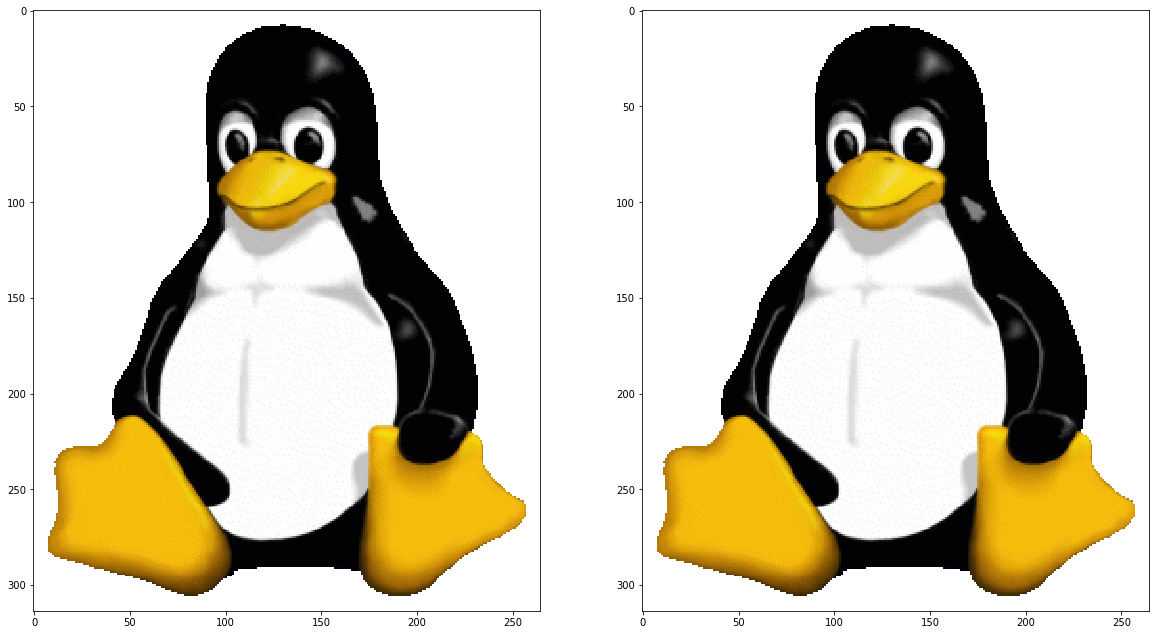

In [1]:
from PIL import Image
from argparse import ArgumentParser
import matplotlib.pyplot as plt

import os

from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend

from cryptography.hazmat.primitives import padding


#  Details about this implementation on pages 76-78 of: 
#      Seth James Nielson. “Practical Cryptography in Python”. Apple Books. 


def enc_dec_image_ecb(image, key, iv=b''):
    image_array = image.tobytes()
    
    print(f'[ENC_DEC] Len of encrypted image bytes {len(image_array)} beginning of decrypt')
    
    image_array    = image.tobytes()
    
    
    encryptor = Cipher(algorithms.AES(key), modes.CBC(iv), backend=default_backend()).encryptor()
    padder = padding.PKCS7(algorithms.AES.block_size).padder()
    
    
    image_array_padded = padder.update(image_array)
    image_array_padded += padder.finalize()
    

    encrypted_image = encryptor.update(image_array_padded)
    encrypted_image += encryptor.finalize()
    # we should never modify the encrypted data, otherwise integrity issues are introduced    
    
    
    
    decryptor = Cipher(algorithms.AES(key), modes.CBC(iv), backend=default_backend()).decryptor()
    unpadder = padding.PKCS7(algorithms.AES.block_size).padder()

    
    
    decrypted_image = decryptor.update(encrypted_image)
    decrypted_image += decryptor.finalize()
    decrypted_image_unpadded = unpadder.update(decrypted_image)
    decrypted_image_unpadded += unpadder.finalize() 
    
    return Image.frombytes("RGB", image.size, decrypted_image_unpadded, "raw", "RGB")



print('Functions defined!')


# This is the original image, to be encrypted with AES in both Modes: ECB and CBC
#AES - CBC ECB
image = Image.open('res/penguin.png').convert('RGBA').convert('RGB') 


#Generate Random AES key 
key = os.urandom(32) # 32 bytes x 8 = 256 bits keysize
iv  = os.urandom(16)

print(f'key:  {key}')

print('\n---  enc_dec_image_ecb  ----')

decrypted_image = enc_dec_image_ecb(image, key, iv)
decrypted_image.save('output/penguin_correct.png')


f, axarr = plt.subplots(1,2, figsize=(20,20))

axarr[0].imshow(image)
axarr[1].imshow(decrypted_image)

